# Moloco Online Test
This document contains solutions to the online test. Breif explanations are added for each problem as requested.

## Q1. Analytics
### 0) Import modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
df = pd.read_csv('Adops & Data Scientist Sample Data - Q1 Analytics.csv', header=0, parse_dates = ['ts'])

In [3]:
df.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [4]:
df = df.sort_values('ts').reset_index(drop=True) # make sure the data is sorted by timestamp

### 1) Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

1. Filter out the data leaving only data points with country_id = "BDV".
2. Group by site_id.
3. Count number of unique user_id's for each site.
4. Sort.

In [5]:
df1 = df[df['country_id']=='BDV']
df1_by_site = df1.groupby('site_id')
site_by_user = df1_by_site['user_id'].nunique().sort_values()
site_by_user

site_id
3POLC      2
N0OTG     90
5NPAU    544
Name: user_id, dtype: int64

In [6]:
ans1_site = site_by_user.index[-1]
ans1_num = site_by_user[-1]
print('{} has the largest number of unique users. The number is {}.'.format(ans1_site, ans1_num))

5NPAU has the largest number of unique users. The number is 544.


### 2) Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)
1. Filter out the data only leaving data points with timestamp between 2019-02-03 00:00:00 and 2019-02-04 23:59:59.
2. Group by user_id and site_id (visits grouped by site for each user).
3. Count how many times each user visited each site.
4. Select data points with more than 10 visits.

In [7]:
df2 = df[('2019-02-03 00:00:00' < df['ts']) & (df['ts']< '2019-02-04 23:59:59')]
df2_by_user_site = df2.groupby(['user_id','site_id'])['site_id'].count().sort_values()

In [8]:
ans2 = df2_by_user_site[df2_by_user_site > 10]
ans2

user_id  site_id
LC3C7E   3POLC      15
LC3C9D   N0OTG      17
LC06C3   N0OTG      25
LC3A59   N0OTG      26
Name: site_id, dtype: int64

### 3) For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)
1. Drop duplicates leaving only the last visit for each user.
2. Group by site_id and count number of unique users for each site (both nunique and count can be used here, since duplicates have been dropped in the previous step).
3. Sort values in descending order.
4. Take top three.

In [9]:
df3 = df.drop_duplicates(subset = ['user_id'], keep='last')

In [10]:
ans3 = df3.groupby('site_id')['user_id'].count().sort_values(ascending = False)[:3]
ans3

site_id
5NPAU    992
N0OTG    561
QGO3G    289
Name: user_id, dtype: int64

In [11]:
print('Top three sites based on unique number of users with last visit to the site are: ' + ', '.join(ans3.index))

Top three sites based on unique number of users with last visit to the site are: 5NPAU, N0OTG, QGO3G


### 4) For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?
1. Create two DataFrames each containing first and last visit by each user.
2. For comparison, sort both DataFrames by user_id and set user_id as index.
3. Compare and count the number of users with first and last visits to the same site.

In [12]:
df4_first = df.drop_duplicates(subset = ['user_id'], keep = 'first').sort_values('user_id')
df4_last = df.drop_duplicates(subset = ['user_id'], keep = 'last').sort_values('user_id')

In [13]:
ans4 = sum(df4_first.set_index('user_id')['site_id'] == df4_last.set_index('user_id')['site_id'])

In [14]:
print('The number of users whose first/last visits are to the same website is {}.'.format(ans4))

The number of users whose first/last visits are to the same website is 1670.


## Q2. Regression
### The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

### Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

Import data.

In [15]:
df5 = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv', header=None)
df5.columns = ['A','B','C']

In [16]:
df5.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


Display distribution of each column to see if there is any outlier.

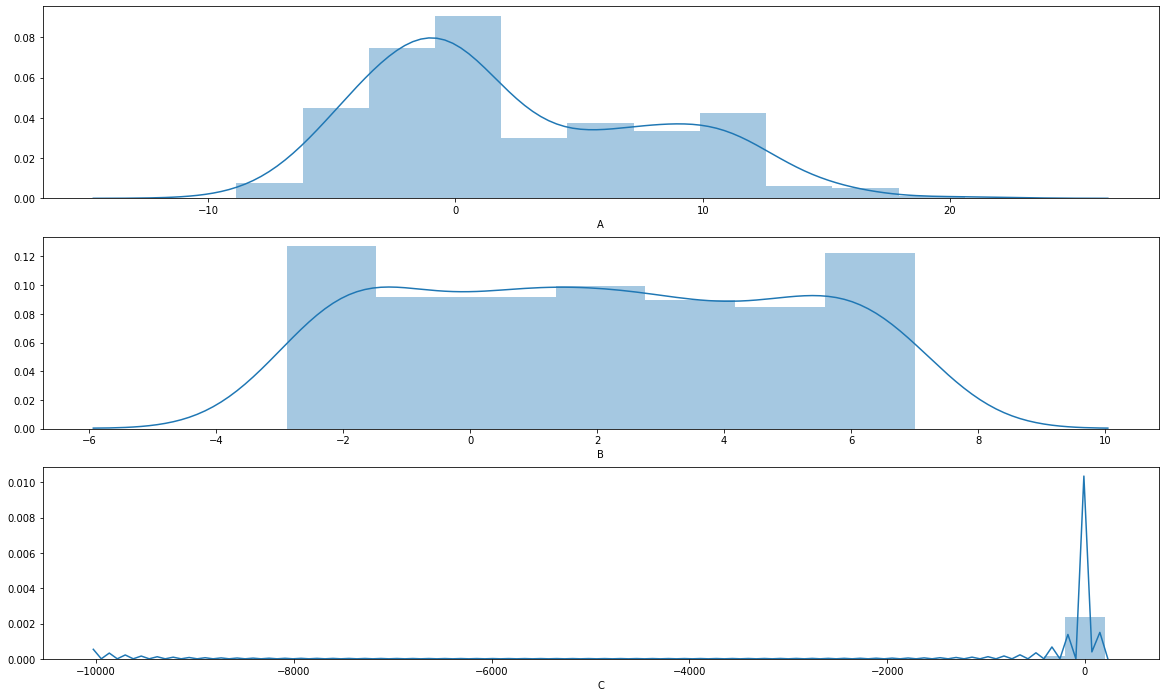

In [17]:
fig, ax = plt.subplots(3, 1, figsize = (20,12))
sns.distplot(df5['A'], ax = ax[0])
sns.distplot(df5['B'], ax = ax[1])
sns.distplot(df5['C'], ax = ax[2]);

In [18]:
df5[df5['C'] < -1000]

,A,B,C
200,10.1,-2.24,-10000.0


Since there is only one point with extreme value of less than -10000 and we only have 300 datapoints, remove the outlier.

In [19]:
df5.drop(200, 0, inplace = True) # drop outlier

Standardize feature columns.

In [20]:
X, y = df5[['A','B']], df5['C']
X = (X - X.mean()) / X.std()

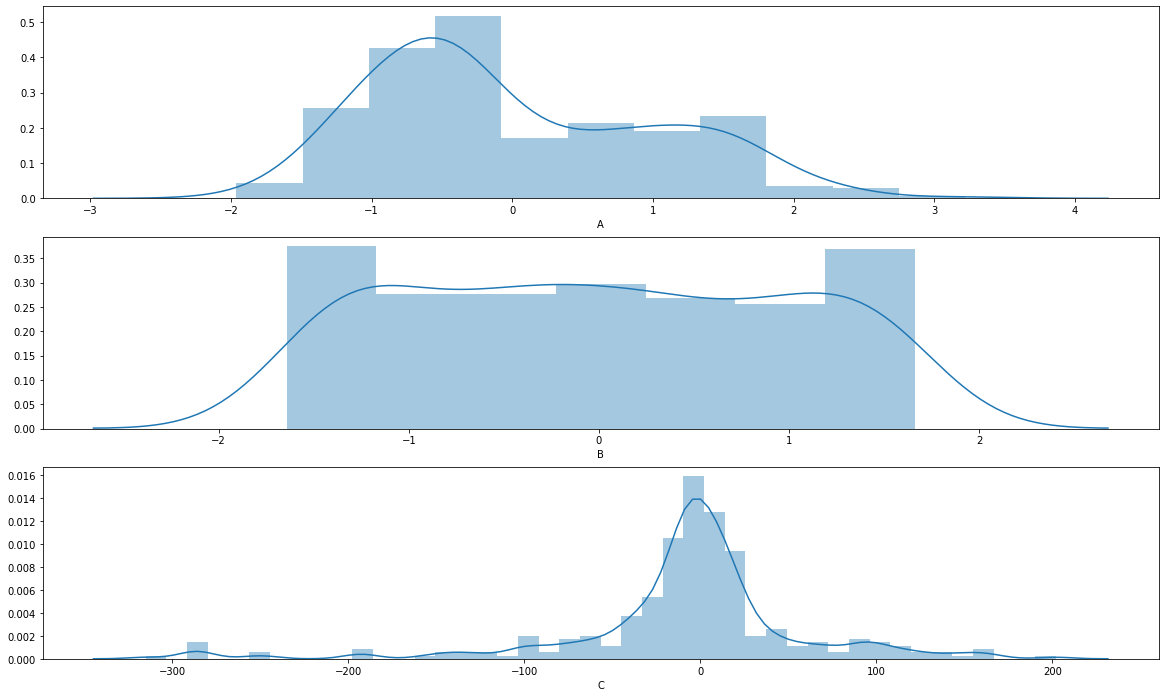

In [21]:
fig, ax = plt.subplots(3, 1, figsize = (20,12))
sns.distplot(X['A'], ax = ax[0])
sns.distplot(X['B'], ax = ax[1])
sns.distplot(y, ax = ax[2]);

Create linear regression model.

In [22]:
class linear_regression():
    # initialize paprameters
    def __init__(self,alpha = 0.0001, num_iter=10000):
        self.alpha = alpha # learning rate
        self.theta = None
        self.num_iter = num_iter

    def cost(self, X, y, theta): # Mean Squared Error
        sse = np.sum(np.power(((X @ theta) - y), 2)) # @ means matrix multiplication
        return sse / len(X)
    
    def predict(self, X):
        if self.theta is None:
            print('Model has not been fitted.')
            return
        if np.size(self.theta) != X.shape[1]:
            print('Input size should be (n, {}).'.format(np.size(self.theta)))
            return 
        preds = np.array(X) @ self.theta
        return preds

    def fit(self, X, y): # Gradient descent to minimize cost
        X = np.array(X)
        y = np.array(y)
        self.theta = np.ones(X.shape[1])
        
        cost_list = []
        for i in range(self.num_iter):
            # Calculate partial derivatives
            update_theta = -2 * np.sum(X * (y - X @ self.theta).reshape(-1,1), axis=0) / len(X)
            self.theta = self.theta - self.alpha * update_theta
            
            cost = self.cost(X, y, self.theta)
            cost_list.append(cost)
            
            if cost_list[i-1] < cost: # stop training if the cost is larger than in the previous iteration
                print('Stopped at i = {}'.format(i))
                return (self.theta, cost_list[i-1])
        return (self.theta, cost)

Define evaluation functions.

In [23]:
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return rmse

def r2(y, y_pred):
    y_bar = y.mean()
    tss = sum((y - y_bar) ** 2)
    rss = sum((y - y_pred) ** 2)
    r2 = 1 - (rss / tss)
    return r2

Define train_test_split.

In [24]:
def train_test_split(*arrays, test_size=0.2, seed=None):
    arr_len = {len(i) for i in arrays}
    if len(arr_len) == 1:
        import random
        n = arr_len.pop()
       
        # optional setting for repeability
        if seed:
            random.seed(seed)

        # shuffle indices
        index = list(range(n))
        random.shuffle(index)

        # split indices
        test_size = int(test_size * n)
        test_idx = index[:test_size]
        train_idx = index[test_size:]
        
        # split data
        result = []
        for arr in arrays:
            result.append(arr.iloc[train_idx])
            result.append(arr.iloc[test_idx])
        return result
    print('Input arrays should be in same length.')

Split data into training data and test data using the function defined.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=1)

Using the linear regression model defined, fit the train data and get predictions from test features.

In [26]:
lr = linear_regression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

Results are displayed in the following manners:
1. RMSE and R computed from the functions defined earlier.
2. Scatter plot of data points and predictions from the model, displaying values of C (target) only.
3. 3D scatter plot of data points and predictions from the model, displaying all A, B, and C.

In [27]:
print('Standard deviation of y_test is: {:.2f}'.format(y_test.std()))
print('RMSE of the model is: {:.2f}'.format(rmse(y_test, preds)))
print('R squared of the model is: {:.2f}'.format(r2(y_test, preds)))

Standard deviation of y_test is: 78.41
RMSE of the model is: 60.87
R squared of the model is: 0.39


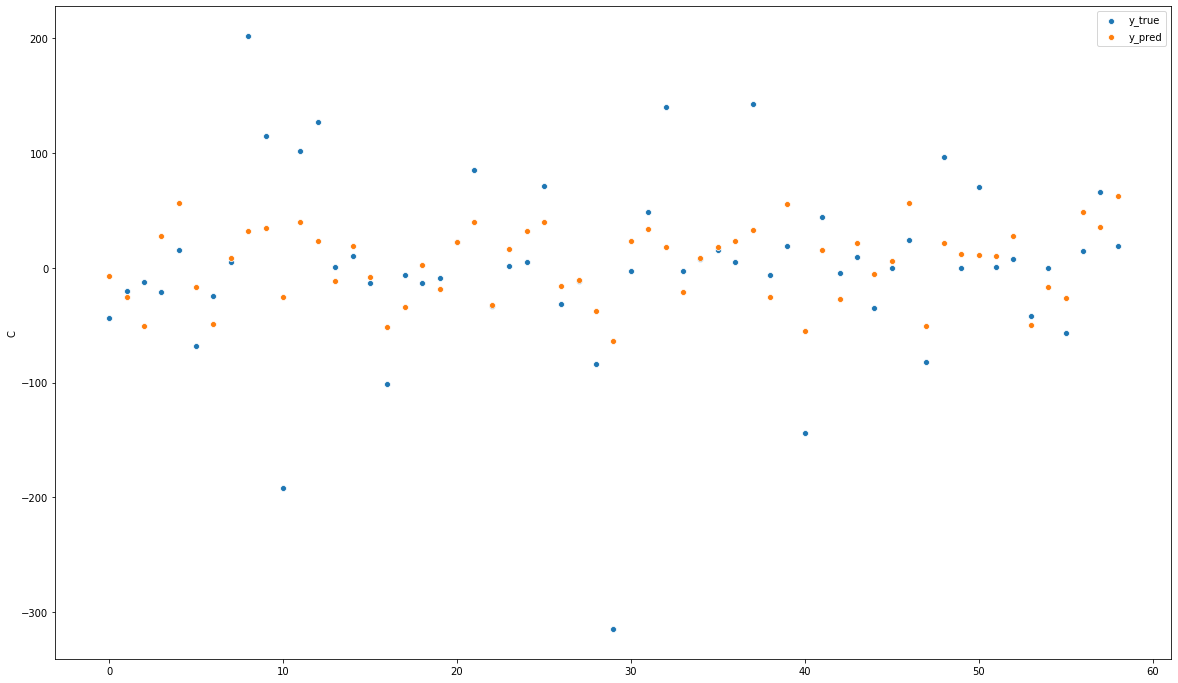

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (20,12))
sns.scatterplot(range(len(y_test)),y_test, ax=ax, label='y_true')
sns.scatterplot(range(len(y_test)),preds, ax=ax, label='y_pred')
ax.legend()
ax.set_ylabel('C')
plt.show()

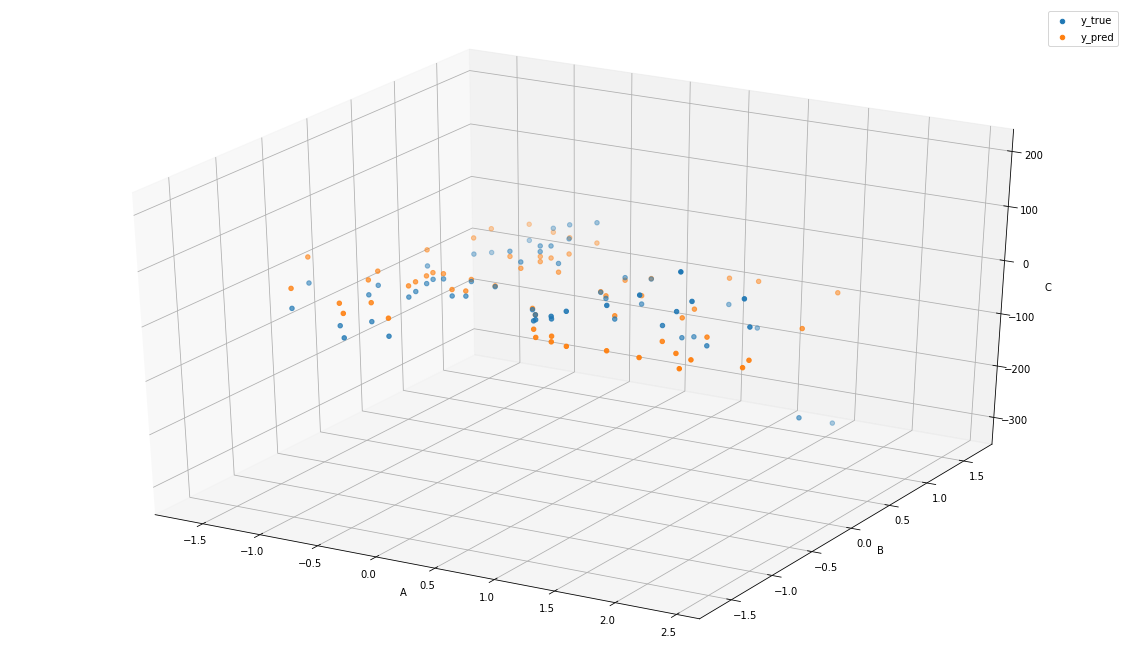

In [29]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['A'], X_test['B'], y_test, label = 'y_true')
ax.scatter(X_test['A'], X_test['B'], preds, label = 'y_pred')
ax.legend()
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()